$$
m x'' + bx' + kx = f(x,t)
$$

 - $m$, mass
 - $b$, friction coefficient
 - $k$, spring stiffness coefficient
 - $f$, excitation function
 
$$
x_1 = x_0', c_0 x_1' + c_1 x_1 + c_2 x_0 = f(t, x_0, x_1)
$$

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
def coefs(t, x, c):
    return c

In [3]:
def system(t, x, c, f):
    c = coefs(t, x, c)
    return [
        (f(t, x) - c[1]*x[1] - c[2]*x[0])/c[0],
        x[0]
    ]

In [4]:
def source(t, x):
    return 0.1*np.sin(7*t + np.pi/3)

In [5]:
t = np.linspace(0, 20, 1001)

In [6]:
x0 = [0, 1]

In [7]:
c = [1, 0.2, 0.5]

In [8]:
sol = solve_ivp(system, [t[0], t[-1]], x0, args=(c, source), t_eval=t)

In [9]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 356
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.  ,  0.02,  0.04, ..., 19.96, 19.98, 20.  ])
 t_events: None
        y: array([[ 0.        , -0.00219255, -0.00425905, ...,  0.00900653,
         0.00990465,  0.01054437],
       [ 1.        ,  0.99997783,  0.99991314, ...,  0.00616658,
         0.0063561 ,  0.00656104]])
 y_events: None

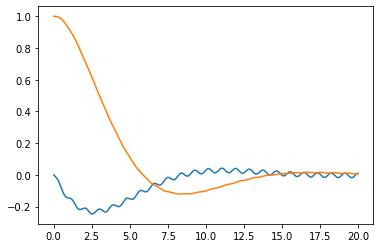

In [10]:
fig, axe = plt.subplots()
axe.plot(t, sol.y.T)

In [11]:
coefs(None, sol.y.T, c)

[1, 0.2, 0.5]